## **Day 1 실습에 오신 것을 환영합니다.**

오늘 배워볼 것은 pytorch 사용을 위한 tensor에 대한 개념과 선형 (linear) 모델로 간단한 데이터 모델을 예측하는 모델을 만들어보려 합니다. 

들어가기에 앞서 pytorch를 다루는데 꼭 필요한 tensor에 대한 개념과 tensor를 다루는 법에 대해서 배워보도록 하겠습니다.

# **Tensor manipulation**

python의 numpy 패키지와 pytorch는 vector, matrix, tensor를 쉽게 다룰 수 있는 많은 함수와 자료구조를 제공합니다. 따라서 공학과 인공지능을 공부하기 위해서 필수적으로 알아두어야 하는 라이브러리들이라고 할 수 있습니다. 간단한 선형 인공지능 모델을 다루기 전에 많이 쓰이고 유용한 함수들을 먼저 공부해봅시다.

본 내용을 공부할 때 정리가 잘 되어있는 레퍼런스를 하단에 첨부하였습니다. 목차에서 "텐서 조작하기(Tensor Manipulation) 1"과 "텐서 조작하기 (Tensor Manipulation) 2"를 참조하는 것을 추천 합니다. 하단에 첨부된 "Pytorch로 시작하는 딥러닝" wikidoc은 강의를 들으면서 같이 공부하시면 인공지능과 딥러닝의 기초를 빠르게 쌓으실 수 있습니다.


https://wikidocs.net/52460

텐서 조작하기 부분에서 알아두면 좋은 몇 가지 대표 함수들을 정리해보았습니다.

1. **텐서의 차원과 형태 관련**

> ```
X, Y        # Tensors
X.dim()  # 차원을 출력
X.shape, X.size() # 텐서의 모양을 출력
```


In [1]:
import torch
X =torch.rand(3,4, 5)

print('X.dim()', X.dim())
print('X.shape', X.shape)
print('X.size()', X.size())

X.dim() 3
X.shape torch.Size([3, 4, 5])
X.size() torch.Size([3, 4, 5])


2. **Mul 과 Matmul의 차이**


> ```
X.matmul(Y) # 행렬 곱 (내적)
X.mul(Y)    # X*Y 와 동일. 각 원소 별로 곱하는 연산.
```




In [2]:
X = torch.rand(3,2,5)
Y = torch.rand(3,5,3)

D = X.matmul(Y) # 행렬 곱 (내적)
print(D)
print(D.shape)
# X.mul(Y)    # X*Y 와 동일. 각 원소 별로 곱하는 연산.


tensor([[[1.1503, 1.3394, 1.6233],
         [0.7436, 1.1973, 1.1290]],

        [[1.2666, 0.6316, 1.7377],
         [1.4110, 1.0910, 2.0092]],

        [[1.3542, 1.8670, 0.9730],
         [1.0127, 1.0598, 0.2727]]])
torch.Size([3, 2, 3])


3. **Broadcasting**

> X의 shape이 [100,1,20] 이고, Y가 [100,40,20] 일때, 크기가 다르기 때문에 원소별 연산 (예; +, * 등) 적용이 불가한 것처럼 보이지만, numpy와 pytorch는 broadcasting을 지원하여, X의 두번째 차원 1인 경우, Y의 두번째 차원인 40에 맞춰 X의 값들을 반복 복제하는 식으로 자동으로 크기를 조절하여 연산이 가능하도록 만들어줍니다.
매번 복제하는 코드를 명시적으로 구현할 필요 없이, 매우 편리하게 응용될 수 있지만, 의도치 않게 broadcasting이 되면 디버깅을 할때 오류를 잡는 것이 어려워 질 수 있으므로 꼭 주의하여 사용 것이 좋습니다.




4. **view() (numpy의 경우는 reshape())**

> 텐서의 shape를 바꿔야할 경우 사용합니다. 매우 자주 쓰이는 함수이므로 꼭 알아두세요!

In [3]:
X.shape
X.view(3,10).shape

torch.Size([3, 10])

5. **axis개념**

> 많은 함수에서 매개변수로 요구되는 개념입니다. 다차원 텐서에 해당 함수 연산을 어떤 축으로 적용 할지를 결정하는데 사용합니다.\
> 예; np.concaternate((A1,B1),axis = 0) 이런식으로 함수의 매개변수 중 하나로 자주 등장합니다.
> \
> \
> 참고자료> http://taewan.kim/post/numpy_sum_axis/ \

6. **squeeze & unsqueeze**

> 특정 차원이 1인 경우 축소시키거나 차원을 확장시킬 때 사용합니다. 자주 등장하므로 알아두면 좋습니다.
> ```
torch.squeeze(X) # X: [100,1,20] => [100,20]
```



7. **type casting**

> 컴퓨터는 여러가지 자료형(int,float,uint8 등)이 있지만 type이 같지 않으면 수치적인 문제가 발생할 수 있기 때문에 항상 유의하는 것이 좋습니다. 따라서 자료형이 무엇인지 그리고 어떻게 바꾸는지 알고 있어야 합니다.

8. **concatenate**

> 두 개 이상의 텐서들을 지정된 축으로 쌓아서 더 큰 텐서를 만드는 함수. 하나의 텐서로 합치기 위한 입력 텐서들은 concatenate하는 축을 제외하고는 모두 같은 크기를 가져야 합니다.

# **1일차 실습**
선형 모델 $f(x) = Wx+b$에 대해서, 주어진 데이터를 제일 잘 표현하는 learnable parameter인 Weight $W$와 Bias $b$를 찾는 방법의 예제 입니다. 이 실습에서는 parameter 탐색을 하는 다양한 방법 중 가장 Naive한 방법으로 찾는 예제를 보여줍니다.

먼저 필요한 라이브러리들을 import합니다.

In [4]:
# 혹시 사용할 수도 있는 라이브러리는 모두 import 해놓았습니다. 혹시 더 필요할 경우 추가하셔도 무방합니다.
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import warnings
warnings.filterwarnings("ignore")

다음의 그래프는 지난 시험의 결과를 토대로 서로 다른 학생의 공부시간과 성적의 관계를 모아놓은 표입니다.

**Q) study time과 Grade 각각을 torch.FloatTensor로 작성하시고, shape는 [7, 1], dimension은 2로 만들어 보세요.**

(힌트) 결과가 궁금하시다면 .shape와 .dim()으로 확인하여 보세요.

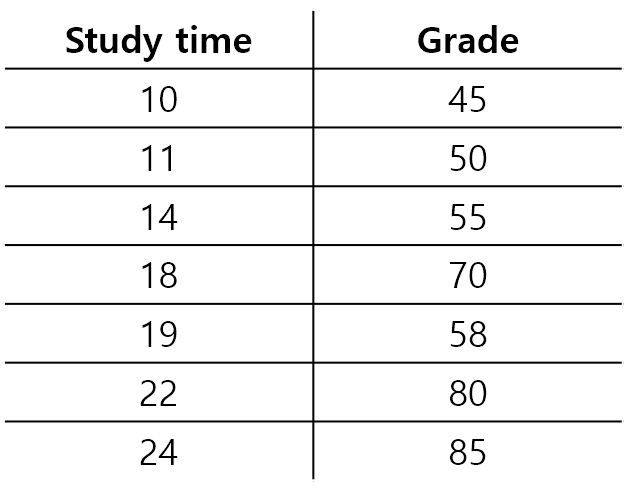

In [5]:
#답안 작성
x_train = torch.FloatTensor([[10],[11],[14],[18],[19],[22],[24]])  #study_time
y_train = torch.FloatTensor([[45],[50],[55],[70],[58],[80],[85]]) #grade

print(x_train.shape, '|', x_train.dim())

torch.Size([7, 1]) | 2


**Q) 위에서 만든 x_train과 y_train이 잘 만들어졌는지 시각화 해보세요.**

시각화 라이브러리인 matplotlib으로 간단하게 시각화 해봅시다.

https://kongdols-room.tistory.com/91

도움이 될만한 링크를 걸어놓았으니 참조해보시면 좋을것 같습니다.

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt

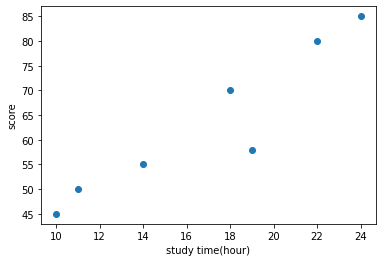

In [8]:
#답안 작성

plt.scatter(x_train, y_train)
plt.xlabel("study time(hour)")
plt.ylabel("score")
plt.show()

이번에는 GDrive와 Colab의 csv 파일을 읽어오는 법과 외부 인터넷 페이지 상의 csv 파일을 읽어오는 법에 배워보도록 하겠습니다.

하단의 링크에는 health_data.csv 파일이 들어있습니다. 이 파일을 다운받은 후 google drive의 가장 기본 디렉토리인 "내 드라이브"로 옮겨주세요.

https://drive.google.com/file/d/1C1_Sh2Rw5St58NLvDer62cJd-bvUvUcs/view?usp=sharing

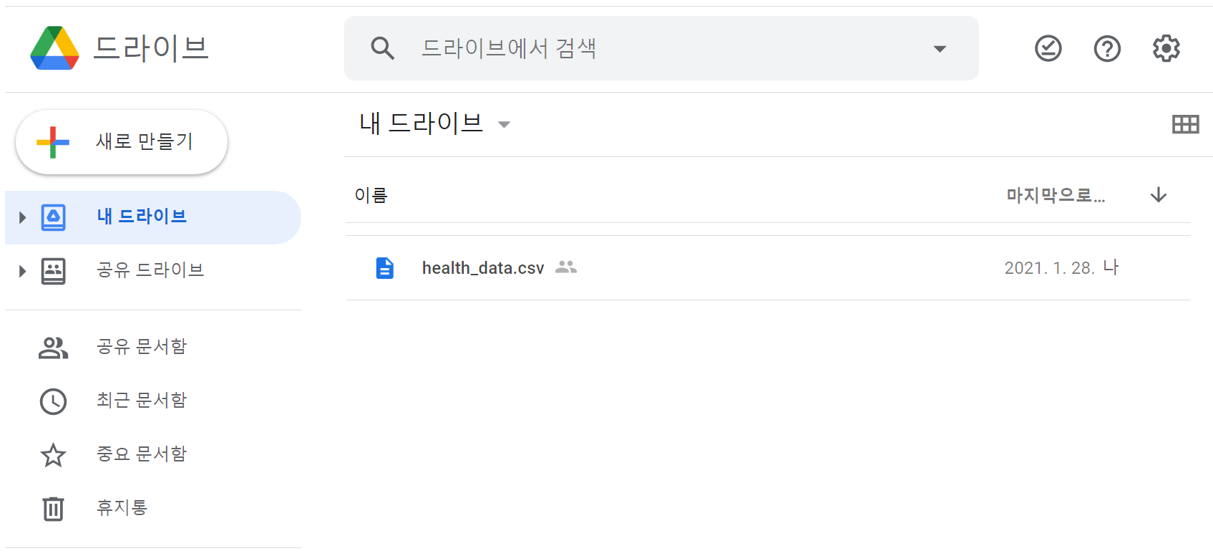

Colab과 Gdrive 모두 google에서 제공하는 서비스이므로 2개를 연동시킬 수 있습니다.

하단의 링크를 참조하시면 친절한 설명이 되어있습니다.

https://starrykss.tistory.com/1029

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


gdrive와 colab을 연동시켰다면 gdrive에서 csv 파일을 가져와 사용해봅시다.

In [10]:
import pathlib
path = pathlib.Path('/content/gdrive/MyDrive/health_data.csv') 

data_file = pd.read_csv(path)
data_file.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,3,169.2,NaN
4,4,154.0,49.275


다음과 같은 결과가 나왔다면 성공적으로 읽은 것입니다.

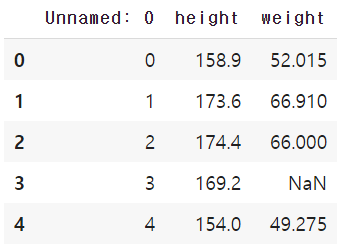

이 데이터는 정제가 되지 않아 데이터가 불완전 한 상태입니다. NaN은 숫자로 표현 불가한 값으로 최적의 Weight $W$와 Bias $b$ 를 찾는데 방해가 됩니다. 이런 데이터들을 모두 제거하는 전처리 작업을 해봅시다.

**Q) 우선 데이터셋 안에 NaN 혹은 null이 있는지 체크합니다.**

(힌트) pandas의 isnull() 이용

In [11]:
#답안 작성

data_file.isnull() #null이 있는 부분에 True

,Unnamed: 0,height,weight
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


**Q)미완성 되어 있는 행을 제거해보세요.** 

(힌트1) pandas의 dropna()이용

(힌트2) axis에 대한 개념을 모르겠다면 tensor manipulation 부분으로 가서 다시 공부해보세요!



In [12]:
#답안 작성
data_file = data_file.dropna(axis=0).reset_index(drop=True)
data_file.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,4,154.0,49.275
4,5,177.7,69.820


NaN이 있던 행이 제거가 잘 되었는지 확인해보세요

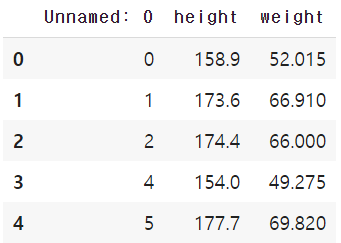

**Q) csv 파일은 아직 pytorch에서 사용할 수 있는 텐서의 형태가 아니므로 tensor의 형태로 바꿔보세요**

(힌트) torch. tensor() 이용

In [13]:
#답안 작성
height = torch.tensor(data_file.height)
weight = torch.tensor(data_file.weight)

**Q) 공부시간과 성적 그래프를 입력할 때 처럼 shape와 dimension을 맞춰주시고, 자료형은 float 타입으로 변환시켜보세요**

(힌트) .view() 함수이용, shape = (50, 1), dimension = 2

In [14]:
#답안 작성
x_train = height.view([height.shape[0],1]).float()
y_train = weight.view([weight.shape[0],1]).float()

 **Q) 랜덤으로 만든 데이터를 기존 데이터에 추가해봅시다. x_train dataset의 경우 145부터 190사이의 랜덤한 숫자 50개, y_train dataset의 경우 45부터 85 사이의 랜덤한 숫자 50개를 생성하여 concatenate를 시킵니다.**

(힌트) 랜덤 생성 함수 torch.rand()함수 사용, concatenate의 경우 torch.cat()함수를 사용합니다. axis도 데이터의 형태에 맞게 사용하시면 됩니다.


In [15]:
#답안 작성
x_train = torch.cat((torch.rand(50,1)*45+145,x_train),axis=0) #0~45 + 145 = 145 ~ 190
y_train = torch.cat((torch.rand(50,1)*40+45,y_train),axis=0) #0~40 + 45 = 45 ~ 85

**Q) training data가 잘 등록이 되었는지 matplotlib 함수를 통해 시각화 해보세요.**


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

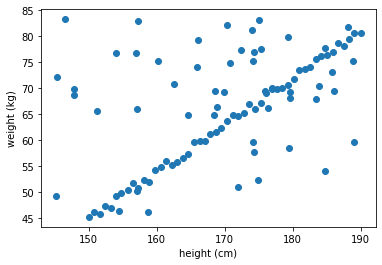

In [17]:
#답안 작성

x = x_train
y = y_train

plt.scatter(x,y)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

대략적으로 이런 형태가 나온다면 잘 된것이라 볼 수 있습니다.

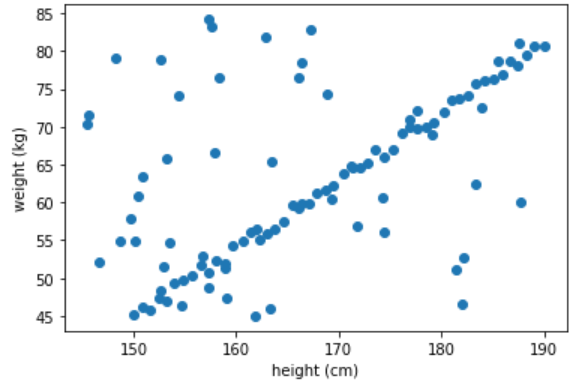

**Q) 이번에는 아래의 파란선처럼 data에 잘 표현하는 직선($y = Wx + b$)을 찾으려합니다. $x$와 $y$는 데이터셋으로부터 주어진 데이터들이기 때문에 $W$와 $b$를 결정하면 됩니다. 기계가 학습하는 방법과 관련된 것을 수업에서 다루지 않았기 때문에, 가장 간단한 방법인 랜덤하게 $W$와 $b$를 바꿔가면서 training dataset을 가장 잘 fitting하는 파라메터들을 찾아봅시다.**

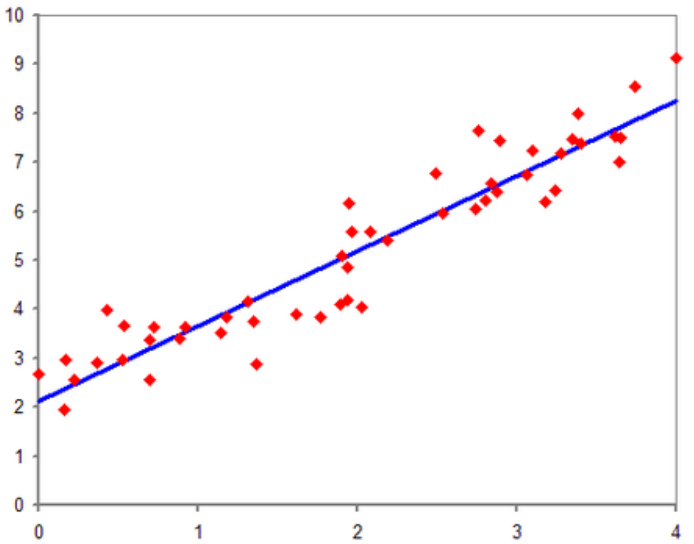

**Q) 총 50000번 $W$, $b$ 값을 바꾸어 training dataset에 가장 잘 fitting 하는 $W$, $b$ 값을 찾아봅시다. $W$, $b$가 가질 수 있는 모든 값을 다 시도해보는 것은 무한한 가능성이 있어서 어마어마하게 많은 시간을 이용해야 합니다. 이번 실습과 같이 작은 문제에서는 적용할 수 있을지 모르겠지만 조금만 차원이 늘어나도 실용적이지 않게 됩니다. 따라서, 이번에는 복잡한 방법이 아니라 Try & Error를 통한 가장 간단한 방법을 시도해 봅시다. 랜덤으로 *실수*를 생성하여 $W$, $b$에 할당 합니다. 그렇게 정해진 $W$, $b$를 이용하여 $y$의 예측을 시도할 수 있습니다.**

$$ hypothesis = Wx + b $$

현재 구한 직선 (Hypothesis)이 데이터에 잘 fitting 되었는지 확인하는 방법으로는  Error $|hypothesis - y|$의 합으로 구하며 이를 loss라고 명명합니다. 일반적으로는 L2 loss라 하여 간단히 $(hypothesis - y)^2$를 사용하나, 본 예제에서는 데이터에 거짓 데이터(Outlier)들이 많이 포함되어 있어, 거짓 데이터에 강인하다고 알려진, L1 loss $|hypothesis - y|$를 사용합니다. 이전에 구했던 loss의 값보다 더 작은 loss가 나올 경우 min_loss에 현재의 loss를, min_W과 min_b에는 현재 $W$와 $b$를 저장합니다.

50000번을 반복하여 생성된 직선을 matplotlib으로 시각화하여 얼마나 현재 training dataset에 얼마나 잘 fitting 되었는지 확인하여보세요.

(힌트) 랜덤으로 숫자를 생성하는 함수로는 torch.rand() 함수를 사용하고, 적당히 크기와 오프셋을 조정해주세요. ([출력범위] = 크기*[입력범위] + 오프셋)


(힌트) 파이썬의 기초가 약하여 if문, for문 같은 문법을 간단하게 공부하고 싶으시다면  wikidoc(https://wikidocs.net/book/1 : jump to python)을 참고하시면 도움이 될것입니다.

(+$\alpha$) |hypothesis - y|의 값들을 모두 더하는 가장 쉬운 방법은 for문을 사용하는 것이지만, 가장 짧게 작성할 수 있는 방법은 벡터화하여 연산하는 방법입니다. https://ooyoung.tistory.com/141 벡터화와 관련된 간단한 설명이 되어있는 링크이며 벡터화를 시키지 않아도 문제를 푸는데는 지장이 없습니다.

In [19]:
#답안 작성

#문제를 푸는데 필요한 변수들이며 필요할 경우 추가 혹은 삭제하셔도 무방합니다.
iter = 50000 #loss값을 구하는 횟수로 총 50000번 
weight_max = 100 #'[입력범위]'로 random값의 weight 범위 제한 목적 ( -50 < weight < 50 )
bias_max = 150 #오프셋으로 random값의 bias 범위 제한 목적 (-150 < bias < 0)
min_loss = 1000000 #업데이트 된 가장 작은 값의 loss 저장 
min_W = 0 
min_b = 0

iteration = 0

#dataset
x = x_train
y = y_train

#L1 loss
def loss_fn(hypo, GT):
  return sum(abs(hypo - GT))

# [Do it yourself] 위의 변수들을 활용하여 문제를 풀어주세요.
for i in range(iter):
  W = (torch.rand(1)-0.5) * weight_max #[-50,50]
  b = (-torch.rand(1)) * bias_max # [-150,0]
  hypothesis = x * W + b
  
  cur_loss = loss_fn(hypothesis,y)

  if cur_loss < min_loss:
      
      min_loss = cur_loss
      min_W = W
      min_b = b

  iteration += 1

  print("iteration : ", iteration)
  print("min_loss : ", min_loss)
  print("min_W : ", min_W, "min_b : ", min_b)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
min_loss :  tensor([634.7916])
min_W :  tensor([0.8868]) min_b :  tensor([-87.4971])
iteration :  48335
min_loss :  tensor([634.7916])
min_W :  tensor([0.8868]) min_b :  tensor([-87.4971])
iteration :  48336
min_loss :  tensor([634.7916])
min_W :  tensor([0.8868]) min_b :  tensor([-87.4971])
iteration :  48337
min_loss :  tensor([634.7916])
min_W :  tensor([0.8868]) min_b :  tensor([-87.4971])
iteration :  48338
min_loss :  tensor([634.7916])
min_W :  tensor([0.8868]) min_b :  tensor([-87.4971])
iteration :  48339
min_loss :  tensor([634.7916])
min_W :  tensor([0.8868]) min_b :  tensor([-87.4971])
iteration :  48340
min_loss :  tensor([634.7916])
min_W :  tensor([0.8868]) min_b :  tensor([-87.4971])
iteration :  48341
min_loss :  tensor([634.7916])
min_W :  tensor([0.8868]) min_b :  tensor([-87.4971])
iteration :  48342
min_loss :  tensor([634.7916])
min_W :  tensor([0.8868]) min_b :  tensor([-87.4971])
iteration :  48343
min_loss :  tensor([634.7916

최종적으로 data에 직선을 잘 fitting 시켰는지 시각화 해봅시다

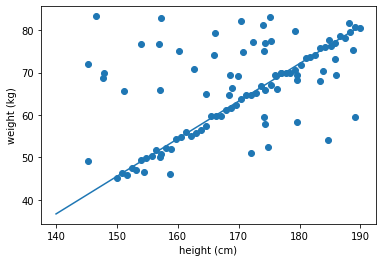

In [20]:
# 직선 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = x_train
y = y_train

plt.scatter(x, y)

t = np.arange(140.,190.,0.001)

plt.plot(t, min_W*t+min_b)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

대략 아래와 같은 결과를 얻으셨다면 Day1의 실습은 마무리가 된 것입니다.

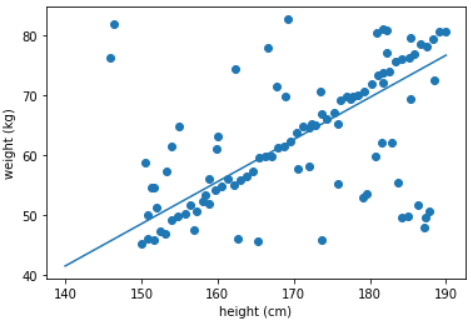

추가적으로 선형 모델의 파라메터를 찾기 위해 필요한 반복횟수에 따른 결과의 품질을 고찰해보시기 바랍니다.
이상적으로 생각되는 모델에 비해, 찾아진 모델의 오차에 대해서 고찰해보시기 바랍니다.

**수고하셨습니다.**